In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import figure

import sys
sys.path.append('../utilities/')
import column_name_mapping as u_cnm
import column_name_mapping as u_cnm
import general_tools as u_gt
import dataframe_operations as u_do
import data_types as u_dt
import data_quality as u_dq

In [2]:
data_raw    = pd.read_csv(Path.cwd() / '..' / 'data' / 'ml_case_training_data.csv')
output_raw = pd.read_csv(Path.cwd() / '..' / 'data' / 'ml_case_training_output.csv')
df = data_raw.merge(output_raw, how='inner', on='id')

In [3]:
summary = u_dt.dtype_summarizer(df)
for date_col in [col for col in summary.cols_of_type('object') if 'date' in col]:
    df[date_col] = pd.to_datetime(df[date_col])
summary = u_dt.dtype_summarizer(df)

Available dtypes: ['object', 'float64', 'int64']
Available dtypes: ['object', 'float64', 'int64', 'datetime64[ns]']


In [4]:
display(summary.cols_of_type('datetime64[ns]'))
df[summary.cols_of_type('datetime64[ns]')].describe()

['date_activ',
 'date_end',
 'date_first_activ',
 'date_modif_prod',
 'date_renewal']

,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal
count,16096,16094,3508,15939,16056
unique,1961,371,1133,2307,398
top,2009-08-01 00:00:00,2016-02-01 00:00:00,2009-07-14 00:00:00,2015-11-01 00:00:00,2015-06-23 00:00:00
freq,99,152,34,592,637
first,2000-07-25 00:00:00,2006-08-26 00:00:00,2001-01-10 00:00:00,2000-07-25 00:00:00,2013-06-26 00:00:00
last,2014-09-01 00:00:00,2017-06-13 00:00:00,2014-09-01 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


In [5]:
col = 'date_activ'
unique = np.sort(df[col].unique())
col_df = pd.DataFrame({'count': np.ones(unique.shape)}, index=unique).cumsum()

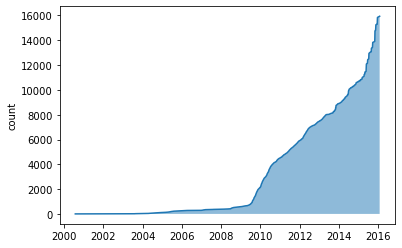

In [13]:
col = 'date_modif_prod'
non_null_indices = ~pd.isna(df[col])
col_df = pd.DataFrame({col: df[non_null_indices][col], 'count': np.ones(sum(non_null_indices))}).groupby(col).sum().sort_index().cumsum()

sns.lineplot(x=col_df.index.values, y=col_df['count'])
plt.fill_between(col_df.index.values, 0, col_df['count'], alpha=0.5)
plt.show()

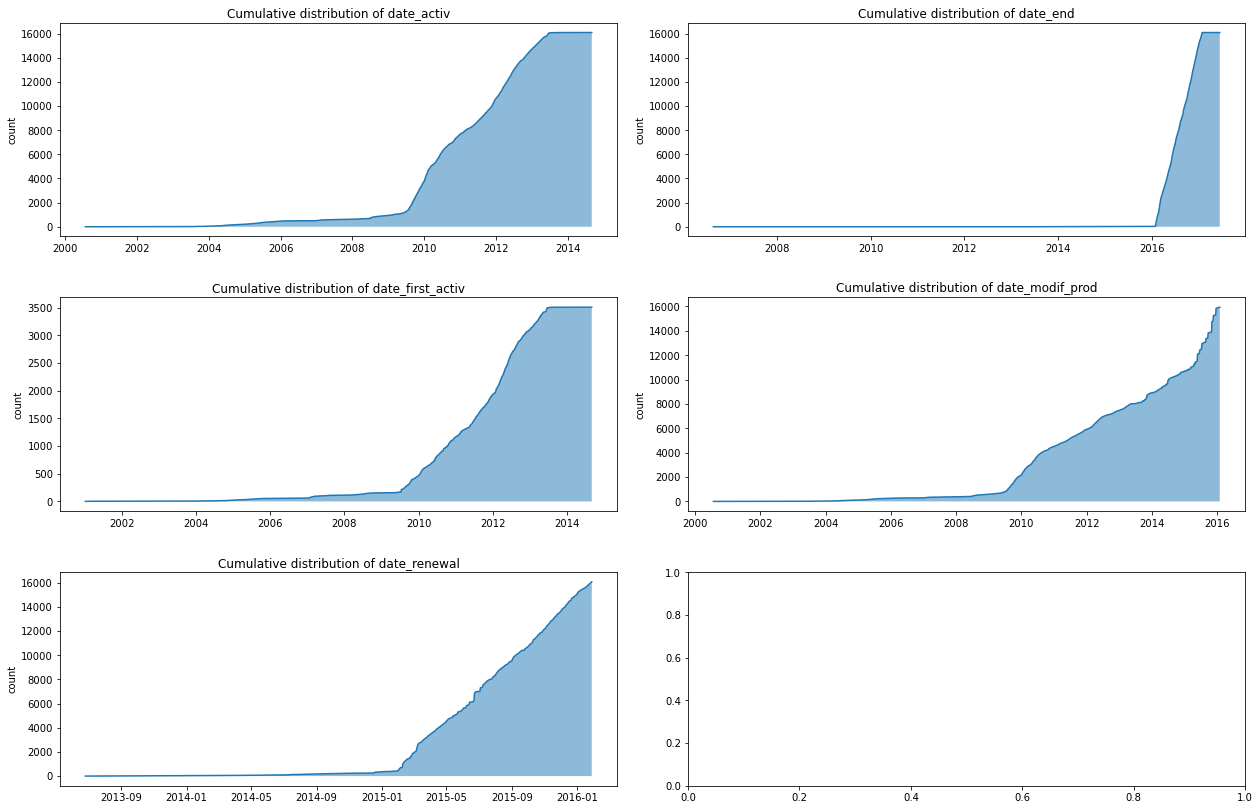

In [7]:
u_dq.datetime_grid(df, summary.cols_of_type('datetime64[ns]'))